# Aim

Explore the provided dataset, visualize interesting relationships and build at least two different ML-models that predicts whether a loan application is approved or not.

# Setup

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [4]:
# Other imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

# Get the data

Open the excel file and extract the data.

In [5]:
# Creating the dataframe
loan_requests = pd.read_excel (r'.\Loan requests.xlsx')

# Quick Look at the Data Structure

In [6]:
print('The shape of our features is:', loan_requests.shape)

The shape of our features is: (1000, 5)


In [7]:
loan_requests.head(5)

Loan Request ID  Gender  Age  Salary Approval
0              732  Female   39  137000      Yes
1              258  Female   41   65500       No
2             1059    Male   42  146500      Yes
3             1075    Male   62   83000      Yes
4              853    Male   42   75000       No

In [8]:
loan_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Loan Request ID  1000 non-null   int64 
 1   Gender           1000 non-null   object
 2   Age              1000 non-null   int64 
 3   Salary           1000 non-null   int64 
 4   Approval         1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [9]:
loan_requests.describe()

Loan Request ID          Age         Salary
count      1000.000000  1000.000000    1000.000000
mean        625.500000    42.106000   72689.000000
std         288.819436    10.707073   34488.341867
min         126.000000    20.000000   15000.000000
25%         375.750000    34.000000   46375.000000
50%         625.500000    42.000000   72000.000000
75%         875.250000    50.000000   90000.000000
max        1125.000000    65.000000  152500.000000

# Divide Features from Labels

**Features** are individual independent variables that act like a input in your system.

**Labels** are the values we want to predict.

"Load Request ID" being an identity number is of no use for the machine learning algorithm, as such we should drop it.

In [10]:
# split data into features and labels
# "Lead Request ID" has no meaning so we drop the column

features = loan_requests.drop(columns=["Loan Request ID", "Approval"])
labels = loan_requests["Approval"]

In [11]:
features.head(3)

Gender  Age  Salary
0  Female   39  137000
1  Female   41   65500
2    Male   42  146500

In [12]:
labels.head(3)

0    Yes
1     No
2    Yes
Name: Approval, dtype: object

# Data Cleaning

## Features

### Ordinal Encoder

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[["Female", "Male"]])
X_Ordinal_Encoder_Sklearn = features.copy()
X_Ordinal_Encoder_Sklearn["Gender"] = ordinal_encoder.fit_transform(features[["Gender"]])
X_Ordinal_Encoder_Sklearn.head(3)

Gender  Age  Salary
0     0.0   39  137000
1     0.0   41   65500
2     1.0   42  146500

### One Hot Encoder

#### Sklearn

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer( (OneHotEncoder(handle_unknown='error', categories=[["Female", "Male"]], drop=None), ['Gender']), remainder='passthrough')
transformed = transformer.fit_transform(features)
X_One_Hot_Encoder_Sklearn = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
X_One_Hot_Encoder_Sklearn.head(3)

onehotencoder__Gender_Female  onehotencoder__Gender_Male  remainder__Age  \
0                           1.0                         0.0            39.0   
1                           1.0                         0.0            41.0   
2                           0.0                         1.0            42.0   

   remainder__Salary  
0           137000.0  
1            65500.0  
2           146500.0

#### Pandas

In [15]:
X_One_Hot_Encoder_Pandas = pd.get_dummies(features)
X_One_Hot_Encoder_Pandas.head(3)

Age  Salary  Gender_Female  Gender_Male
0   39  137000              1            0
1   41   65500              1            0
2   42  146500              0            1

### What encoder to use?

In [16]:
X = X_One_Hot_Encoder_Pandas.drop(columns=["Gender_Female", "Gender_Male"])

# Labels

In [17]:
y = labels.replace("Yes", True).replace("No", False)
y.head(3)

0     True
1    False
2     True
Name: Approval, dtype: bool

# Closer Look at the Data Structure

## Age

### Histogram

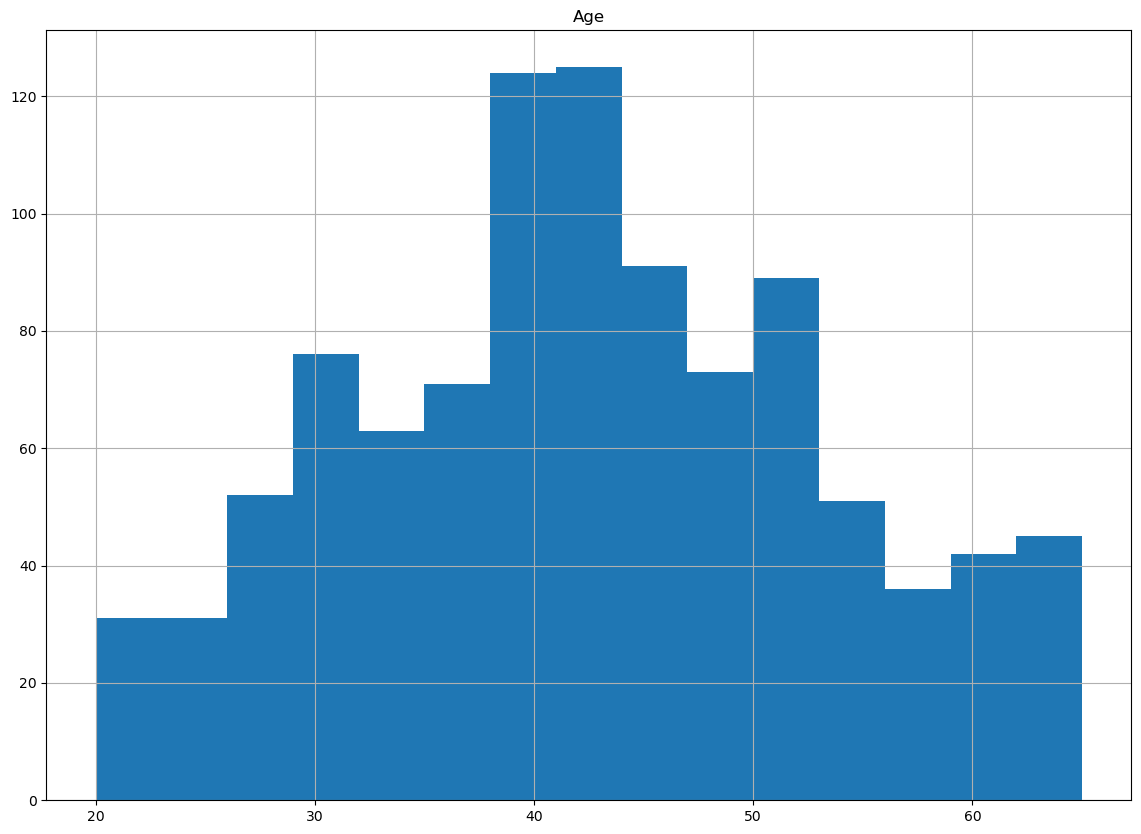

In [18]:
X.hist(column = "Age", bins="auto", figsize=(14,10))
plt.show()

### Box Plot

In [19]:
X.boxplot(column=['Age'])

<AxesSubplot:>

## Salary

### Histogram

In [20]:
X.hist(column = "Salary", bins="auto", figsize=(14,10))
plt.show()

### Box Plot

<AxesSubplot:>

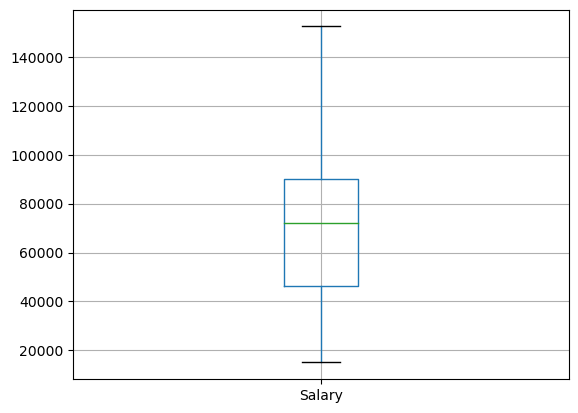

In [21]:
X.boxplot(column=['Salary'])

# Create a Test Set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

Age  Salary
29    35   28000
535   51   74000
695   40   60500
557   53   35500
836   49  105000
..   ...     ...
106   42   82500
270   35  113000
860   43   60500
435   49   97500
102   42   80500

[800 rows x 2 columns]

`X_train` - This includes your all independent variables that will be used to train the model. Also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model.

`X_test` - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

`y_train` - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

`y_test` - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

-----

To understand when to use lowercase or uppercase, we need to know what is represented in `X_train` or `X_test`. It is a capital letter `X` to represent a 2-D matrix. And for `y_train` and `y_test`, it is a small letter `y` to represent a 1-D vector.

## Train Set

In [23]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)

Training Features Shape: (800, 2)
Training Labels Shape: (800,)


## Test Set

In [24]:
print('Test Features Shape:', X_test.shape)
print('Test Labels Shape:', y_test.shape)

Test Features Shape: (200, 2)
Test Labels Shape: (200,)


# Baseline

Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model.
If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem.

# Stochastic Gradient Descent (SGD) learning

## Training

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, class_weight="balanced")
sgd_clf.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

`fit` is Scikit-learn’s name for training

## Performance Measures

### Cross-Validation

K-fold cross-validation means splitting the training set into K folds, then training the model K times, holding out a different fold each time for evaluation

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.40074906, 0.40449438, 0.40225564])

### Confusion Matrix

The general idea of a confusion matrix is to count the number of times instances of class A are classified as class B, for all A/B pairs. For example, to know the number of times the classifier confused images of 8s with 0s, you would look at row #8, column #0 of the confusion matrix.

In [27]:
from sklearn.model_selection import cross_val_predict

sdg_cls_train_predictions = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (by “clean” I mean “out-of-sample”: the model makes predictions on data that it never saw during training).

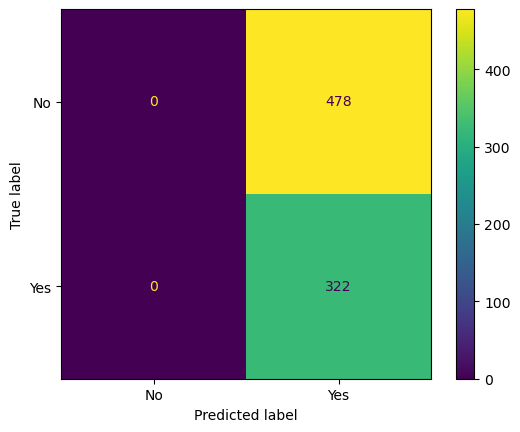

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, sdg_cls_train_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
cmd.plot()

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. A perfect classifier would only have true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

### Precision and Recall

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train, sdg_cls_train_predictions))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       478
        True       0.40      1.00      0.57       322

    accuracy                           0.40       800
   macro avg       0.20      0.50      0.29       800
weighted avg       0.16      0.40      0.23       800



c:\Users\albif\anaconda3\envs\NewML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\albif\anaconda3\envs\NewML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\albif\anaconda3\envs\NewML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Receiver Operator Characteristic (ROC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

In [30]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, sdg_cls_train_predictions)
plt.show()

### Area Under the Curve (AUC)

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

- When **AUC = 1**, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

- When **0.5 < AUC < 1**, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

- When **AUC = 0.5**, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In [31]:
from sklearn.metrics import roc_auc_score

auc_score_sdg_cls = roc_auc_score(y_train, sdg_cls_train_predictions)
print(auc_score_sdg_cls)

0.5


# Random Forest Classifier

## Training

In [32]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

## Feature Importance

### Based on Mean Decrease in Impurity
Feature importances are provided by the fitted attribute `feature_importances_` and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

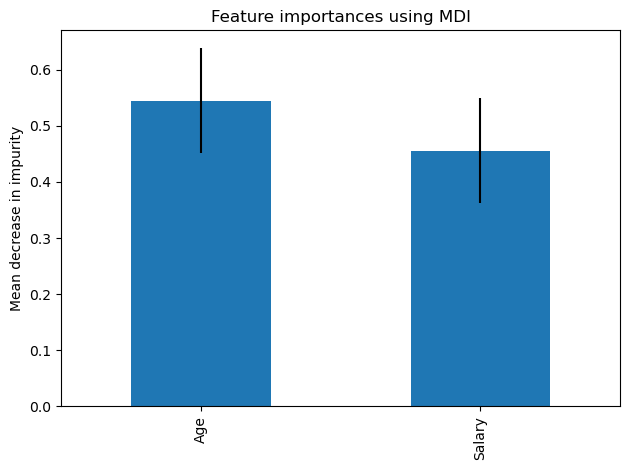

In [33]:
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Performance Measures

### Train Set

#### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88764045, 0.92509363, 0.87969925])

#### Confusion Matrix

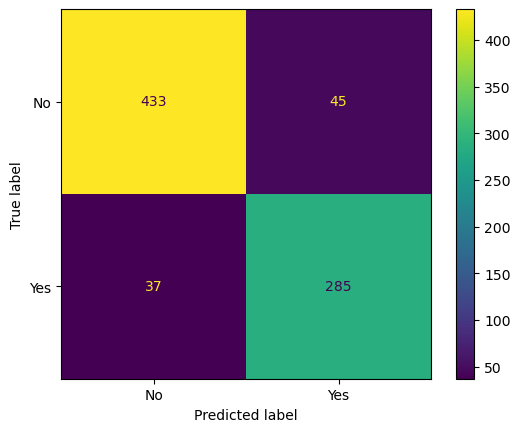

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rnd_cls_train_predictions = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, rnd_cls_train_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
cmd.plot()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, rnd_cls_train_predictions))

              precision    recall  f1-score   support

       False       0.92      0.91      0.91       478
        True       0.86      0.89      0.87       322

    accuracy                           0.90       800
   macro avg       0.89      0.90      0.89       800
weighted avg       0.90      0.90      0.90       800



#### Receiver Operator Characteristic (ROC)

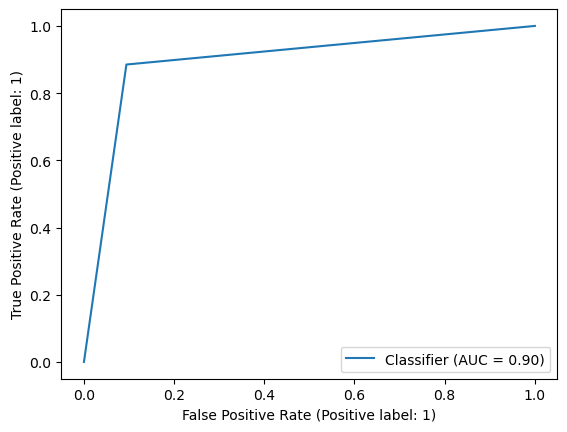

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, rnd_cls_train_predictions)
plt.show()

#### Area Under the Curve (AUC)

In [38]:
from sklearn.metrics import roc_auc_score

auc_score_rnd_cls = roc_auc_score(y_train, rnd_cls_train_predictions)
print(auc_score_rnd_cls)

0.8954754541438188


### Test set

In [39]:
rnd_cls_test_predictions = rnd_clf.predict_proba(X_test)[:, 1]

#### Receiver Operator Characteristic (ROC)

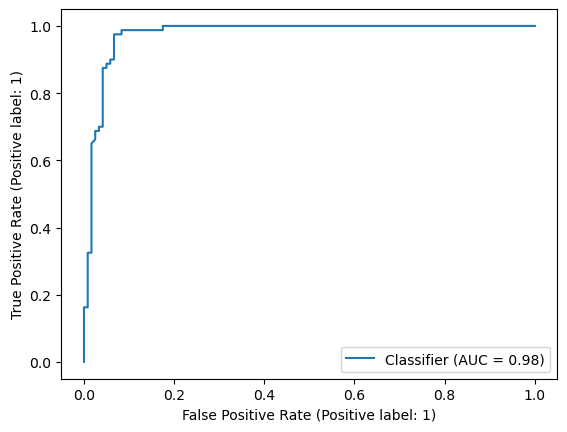

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, rnd_cls_test_predictions)
plt.show()

#### Area Under the Curve (AUC)

In [42]:
auc_score_rnd_cls = roc_auc_score(y_test, rnd_cls_test_predictions)
print(auc_score_rnd_cls)

0.9750520833333334


# Logistic Regression

## Training

In [43]:
from sklearn.linear_model import LogisticRegression

lre_clf = LogisticRegression(n_jobs=-1, random_state=42)
lre_clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

## Performance Measures

### Train Set

#### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(lre_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.56554307, 0.8576779 , 0.59774436])

#### Confusion Matrix

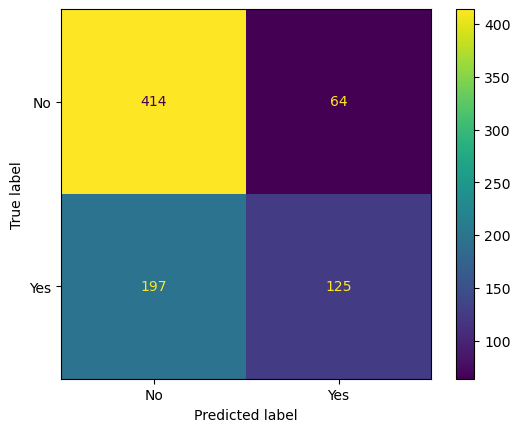

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lre_cls_train_predictions = cross_val_predict(lre_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, lre_cls_train_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
cmd.plot()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lre_cls_train_predictions))

              precision    recall  f1-score   support

       False       0.68      0.87      0.76       478
        True       0.66      0.39      0.49       322

    accuracy                           0.67       800
   macro avg       0.67      0.63      0.62       800
weighted avg       0.67      0.67      0.65       800



### Test set

In [47]:
lre_cls_test_predictions = lre_clf.predict_proba(X_test)[:, 1]

#### Receiver Operator Characteristic (ROC)

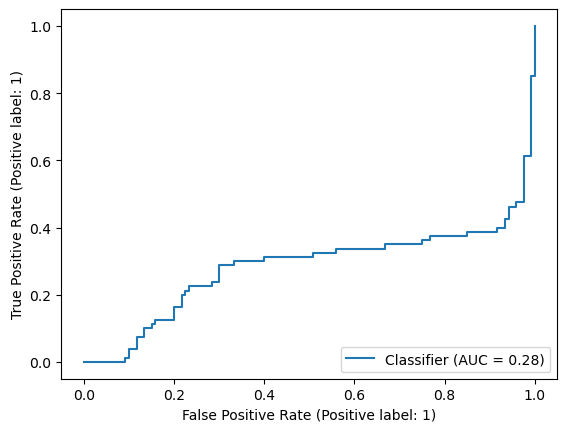

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, lre_cls_test_predictions)
plt.show()

#### Area Under the Curve (AUC)

In [49]:
auc_score_lre_cls = roc_auc_score(y_test, lre_cls_test_predictions)
print(auc_score_lre_cls)

0.2828125
